In [735]:
# Nama   : Mia Amaliah 
# NIM    : 1202922002
# Tugas : SVM

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv


In [736]:
data = pd.read_csv ('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')
data

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0


In [737]:
data.drop(['Country'],axis=1,inplace=True)

In [738]:
data.drop(['Firstname'],axis=1,inplace=True)

In [739]:
data.drop(['Lastname'],axis=1,inplace=True)

In [740]:
data['Sex'] = data ['Sex'].replace ({'M':0,'F':1})

In [741]:
data['Category'] = data ['Category'].replace ({'P':0,'C':1})

In [742]:
data.head()

,PassengerId,Sex,Age,Category,Survived
0,1,0,62,0,0
1,2,1,22,1,0
2,3,1,21,1,0
3,4,0,53,1,0
4,5,1,55,0,0


In [743]:
data.isna().sum()

PassengerId    0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [744]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  989 non-null    int64
 1   Sex          989 non-null    int64
 2   Age          989 non-null    int64
 3   Category     989 non-null    int64
 4   Survived     989 non-null    int64
dtypes: int64(5)
memory usage: 38.8 KB


<AxesSubplot:>

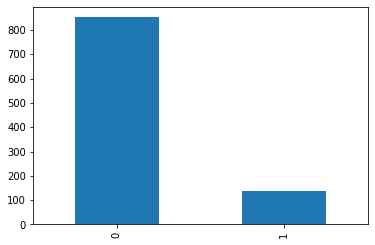

In [745]:
data['Survived'].value_counts().plot(kind = 'bar')

In [746]:
x=data.drop(['Survived'],axis=1).values
y=data['Survived'].values
print (x)
print (y)

[[  1   0  62   0]
 [  2   1  22   1]
 [  3   1  21   1]
 ...
 [987   0  77   0]
 [988   1  87   0]
 [989   0  42   0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 

In [747]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(692, 4) (692,)
(297, 4) (297,)


In [748]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test)
print(x_train)

[[-0.60618626  1.02044007 -0.32957909  2.08910054]
 [ 0.27638362 -0.97996936  1.11462514 -0.4786749 ]
 [ 0.63503751  1.02044007  0.30587077 -0.4786749 ]
 ...
 [-1.51688585  1.02044007  0.07479809 -0.4786749 ]
 [ 0.88117254  1.02044007  1.05685697 -0.4786749 ]
 [-0.01897841  1.02044007  1.46123416 -0.4786749 ]]
[[ 1.7356127  -0.97996936  1.86561135 -0.4786749 ]
 [ 0.59987537 -0.97996936  0.53694345 -0.4786749 ]
 [ 1.55276954 -0.97996936 -1.02279713 -0.4786749 ]
 ...
 [ 1.46134796 -0.97996936 -0.09850642  2.08910054]
 [-0.90506451  1.02044007 -0.09850642 -0.4786749 ]
 [-1.60127501 -0.97996936 -0.5028836  -0.4786749 ]]


In [749]:
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [750]:
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [751]:
y_predict = svc.predict(x_test)
print (y_predict)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [752]:
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score (y_test,y_predict)
cr = classification_report (y_test,y_predict)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


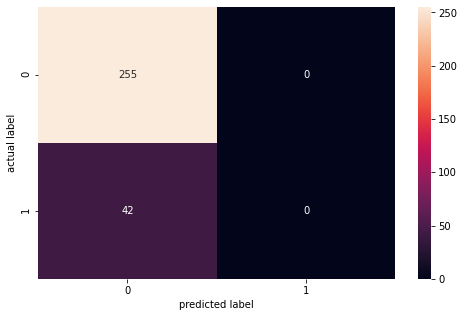

0.8585858585858586
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       255
           1       0.00      0.00      0.00        42

    accuracy                           0.86       297
   macro avg       0.43      0.50      0.46       297
weighted avg       0.74      0.86      0.79       297



In [753]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)